name: Soji Ademiluyi  
email: aademilu@uncc.edu

# Pandas Extra Credit Assignment

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Beginning my exploratory analysis I am using four datasets.   
`households` is a dataset with information on population and household statistics by state.  
`confirmed_US` is a dataset using the confirmed covid statistics for the united states by state.  
`deaths_US` is a dataset with records of covid deaths by state.  
`homeWork` is a dataset of work from home particiption.

In [64]:
households = pd.read_csv("Households_by_Type_-_States_2015-2019.csv")
confirmed_US = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths_US = pd.read_csv("time_series_covid19_deaths_US.csv")
homeWork = pd.read_csv("Worked_at_Home_-_States_2015-2019.csv")

In [65]:
households.head()

,OBJECTID,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,...,DP02_0004E,DP02_0004M,DP02_0015E,DP02_0015M,DP02_0007PM,DP02_0011PM,DP02_0007PE,DP02_0011PE,SHAPE_Length,SHAPE_Area
0,1,1,1779775,0400000US01,1,AL,Alabama,0,131174192284,4593183334,...,78846,1841,565454,2531,0.1,0.1,1.1,6.4,18.985614,12.891866
1,2,2,1785533,0400000US02,2,AK,Alaska,0,1478927050067,245394222619,...,19864,884,57894,669,0.2,0.3,2.0,4.6,566.659984,282.010909
2,3,4,1779777,0400000US04,4,AZ,Arizona,0,294360282618,859561204,...,186529,3378,826799,2994,0.1,0.1,1.5,5.0,23.841908,28.919220
3,4,5,68085,0400000US05,5,AR,Arkansas,0,134776580080,2956395922,...,62284,2091,348228,2151,0.1,0.2,1.4,6.2,21.859056,13.585449
4,5,6,1779778,0400000US06,6,CA,California,0,403660088482,20305454540,...,874868,6012,3803822,9028,0.1,0.1,1.3,4.8,44.117752,41.668273


The first thing I want to do is change the cryptic headings of the households and homeWork dataframes.  
I start by copying the list of attributes from the source data website.  

Next I can use a series of vim macros to extract all of the header and alias pairs into a dictionary data structure.  
1. Macro(@r) -> `2f,D[esc]a'[esc]F:r'jdF(jr'^i'[esc]^j`  
2. Macro(@t) -> `3f'a,[esc]^j`

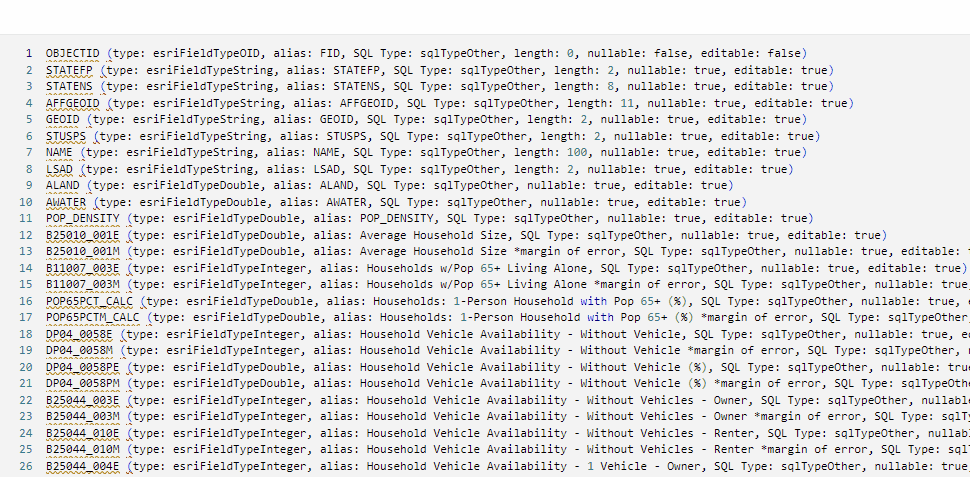

In [27]:
from IPython.display import Image
Image(filename='cutting.gif')

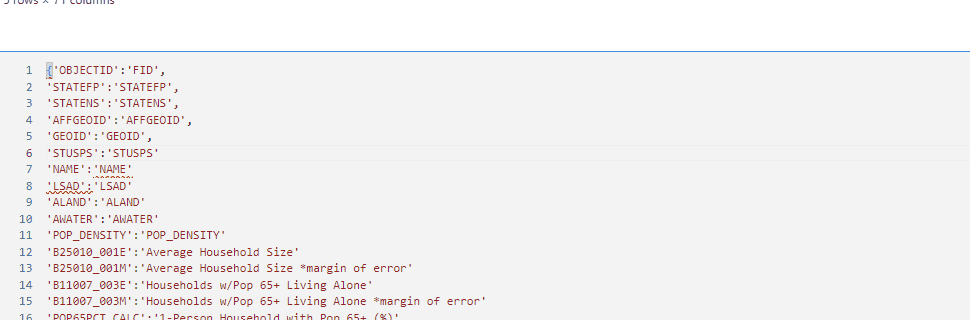

In [28]:
from IPython.display import Image
Image(filename='cutting2.gif')

In [18]:
nameIndex = {'OBJECTID':'FID',
'STATEFP':'STATEFP',
'STATENS':'STATENS',
'AFFGEOID':'AFFGEOID',
'GEOID':'GEOID',
'STUSPS':'STUSPS',
'NAME':'NAME',
'LSAD':'LSAD',
'ALAND':'ALAND',
'AWATER':'AWATER',
'POP_DENSITY':'POP_DENSITY',
'B25010_001E':'Average Household Size',
'B25010_001M':'Average Household Size *margin of error',
'B11007_003E':'Households w/Pop 65+ Living Alone',
'B11007_003M':'Households w/Pop 65+ Living Alone *margin of error',
'POP65PCT_CALC':'1-Person Household with Pop 65+ (%)',
'POP65PCTM_CALC':'1-Person Household with Pop 65+ (%) *margin of error',
'DP04_0058E':'Household Vehicle Availability - Without Vehicle',
'DP04_0058M':'Household Vehicle Availability - Without Vehicle *margin of error',
'DP04_0058PE':'Household Vehicle Availability - Without Vehicle (%)',
'DP04_0058PM':'Household Vehicle Availability - Without Vehicle (%) *margin of error',
'B25044_003E':'Household Vehicle Availability - Without Vehicles - Owner',
'B25044_003M':'Household Vehicle Availability - Without Vehicles - Owner *margin of error',
'B25044_010E':'Household Vehicle Availability - Without Vehicles - Renter',
'B25044_010M':'Household Vehicle Availability - Without Vehicles - Renter *margin of error',
'B25044_004E':'Household Vehicle Availability - 1 Vehicle - Owner',
'B25044_004M':'Household Vehicle Availability - 1 Vehicle - Owner *margin of error',
'B25044_011E':'Household Vehicle Availability - 1 Vehicle - Renter',
'B25044_011M':'Household Vehicle Availability - 1 Vehicle - Renter *margin of error',
'DP04_0059E':'Household Vehicle Availability - 1 Vehicle - Total',
'DP04_0059M':'Household Vehicle Availability - 1 Vehicle - Total *margin of error',
'B25044_005E':'Household Vehicle Availability - 2 Vehicles - Owner',
'B25044_005M':'Household Vehicle Availability - 2 Vehicles - Owner *margin of error',
'B25044_012E':'Household Vehicle Availability - 2 Vehicles - Renter',
'B25044_012M':'Household Vehicle Availability - 2 Vehicles - Renter *margin of error',
'DP04_0060E':'Household Vehicle Availability - 2 Vehicles - Total',
'DP04_0060M':'Household Vehicle Availability - 2 Vehicles - Total *margin of error',
'B25044_006E':'Household Vehicle Availability - 3 Vehicles - Owner',
'B25044_006M':'Household Vehicle Availability - 3 Vehicles - Owner *margin of error',
'B25044_013E':'Household Vehicle Availability - 3 Vehicles -Renter',
'B25044_013M':'Household Vehicle Availability - 3 Vehicles -Renter *margin of error',
'HOUSE3VEHICLE_CALC':'Household Vehicle Availability - 3 Vehicles -Total',
'HOUSE3VEHICLE_CALCM':'Household Vehicle Availability - 3 Vehicles - Total *margin of error',
'B25044_007E':'Household Vehicle Availability - 4 Vehicles - Owner',
'B25044_007M':'Household Vehicle Availability - 4 Vehicles - Owner *margin of error',
'B25044_014E':'Household Vehicle Availability - 4 Vehicles - Renter',
'B25044_014M':'Household Vehicle Availability - 4 Vehicles - Renter *margin of error',
'HOUSE4VEHICLE_CALC':'Household Vehicle Availability - 4 Vehicles - Total',
'HOUSE4VEHICLE_CALCM':'Household Vehicle Availability - 4 Vehicles - Total *margin of error',
'B25044_008E':'Household Vehicle Availability - 5 or More Vehicles - Owner',
'B25044_008M':'Household Vehicle Availability - 5 or More Vehicles - Owner *margin of error',
'B25044_015E':'Household Vehicle Availability - 5 or More Vehicles - Renter',
'B25044_015M':'Household Vehicle Availability - 5 or More Vehicles - Renter *margin of error',
'HOUSE5VEHICLE_CALC':'Household Vehicle Availability - 5 or More Vehicles - Total',
'HOUSE5VEHICLE_CALCM':'Household Vehicle Availability - 5 or More Vehicles - Total *margin of error',
'DP02_0001E':'All Households',
'DP02_0001M':'All Households *margin of error',
'DP02_0007E':'Total Male Householder',
'DP02_0007M':'Total Male Householder',
'DP02_0011E':'Total Female Householder',
'DP02_0011M':'Total Female Householder',
'DP02_0004E':'Total Cohabitating Couple Households',
'DP02_0004M':'Total Cohabitating Couple Households *margin of error',
'DP02_0015E':'Total Households with one or more people 65 years and over',
'DP02_0015M':'Total Households with one or more people 65 years and over *margin of error',
'DP02_0007PM':'Percentage of Households - Male Householder',
'DP02_0011PM':'Percentage of Households - Female Householder',
'DP02_0007PE':'Percentage of Households - Male Householder',
'DP02_0011PE':'Percentage of Households - Female Householder'}

In [67]:
households.rename(nameIndex, axis=1, inplace=True)
households.head()

,FID,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,...,Total Cohabitating Couple Households,Total Cohabitating Couple Households *margin of error,Total Households with one or more people 65 years and over,Total Households with one or more people 65 years and over *margin of error,Percentage of Households - Male Householder,Percentage of Households - Female Householder,Percentage of Households - Male Householder,Percentage of Households - Female Householder,SHAPE_Length,SHAPE_Area
0,1,1,1779775,0400000US01,1,AL,Alabama,0,131174192284,4593183334,...,78846,1841,565454,2531,0.1,0.1,1.1,6.4,18.985614,12.891866
1,2,2,1785533,0400000US02,2,AK,Alaska,0,1478927050067,245394222619,...,19864,884,57894,669,0.2,0.3,2.0,4.6,566.659984,282.010909
2,3,4,1779777,0400000US04,4,AZ,Arizona,0,294360282618,859561204,...,186529,3378,826799,2994,0.1,0.1,1.5,5.0,23.841908,28.919220
3,4,5,68085,0400000US05,5,AR,Arkansas,0,134776580080,2956395922,...,62284,2091,348228,2151,0.1,0.2,1.4,6.2,21.859056,13.585449
4,5,6,1779778,0400000US06,6,CA,California,0,403660088482,20305454540,...,874868,6012,3803822,9028,0.1,0.1,1.3,4.8,44.117752,41.668273


I want to be margin of error agnostic, so I will use a similar macro to remove all key value pairs containing "margin of error", and one to remove the old labels.

In [30]:
removeIndex = {'FID',
'STATEFP',
'STATENS',
'AFFGEOID',
'GEOID',
'STUSPS',
'NAME',
'LSAD',
'ALAND',
'AWATER',
'POP_DENSITY',
'Average Household Size',
'Households w/Pop 65+ Living Alone',
'1-Person Household with Pop 65+ (%)',
'Household Vehicle Availability - Without Vehicle',
'Household Vehicle Availability - Without Vehicle (%)',
'Household Vehicle Availability - Without Vehicles - Owner',
'Household Vehicle Availability - Without Vehicles - Renter',
'Household Vehicle Availability - 1 Vehicle - Owner',
'Household Vehicle Availability - 1 Vehicle - Renter',
'Household Vehicle Availability - 1 Vehicle - Total',
'Household Vehicle Availability - 2 Vehicles - Owner',
'Household Vehicle Availability - 2 Vehicles - Renter',
'Household Vehicle Availability - 2 Vehicles - Total',
'Household Vehicle Availability - 3 Vehicles - Owner',
'Household Vehicle Availability - 3 Vehicles -Renter',
'Household Vehicle Availability - 3 Vehicles -Total',
'Household Vehicle Availability - 4 Vehicles - Owner',
'Household Vehicle Availability - 4 Vehicles - Renter',
'Household Vehicle Availability - 4 Vehicles - Total',
'Household Vehicle Availability - 5 or More Vehicles - Owner',
'Household Vehicle Availability - 5 or More Vehicles - Renter',
'Household Vehicle Availability - 5 or More Vehicles - Total',
'All Households',
'Total Male Householder',
'Total Male Householder',
'Total Female Householder',
'Total Female Householder',
'Total Cohabitating Couple Households',
'Total Households with one or more people 65 years and over',
'Percentage of Households - Male Householder',
'Percentage of Households - Female Householder',
'Percentage of Households - Male Householder',
'Percentage of Households - Female Householder'}


In [68]:
households = households[removeIndex].set_index('NAME')
households.head()

,Household Vehicle Availability - 2 Vehicles - Total,Household Vehicle Availability - 1 Vehicle - Renter,FID,Total Households with one or more people 65 years and over,STATEFP,Household Vehicle Availability - 1 Vehicle - Owner,Household Vehicle Availability - 2 Vehicles - Owner,ALAND,Household Vehicle Availability - Without Vehicles - Renter,Average Household Size,...,Percentage of Households - Female Householder,Percentage of Households - Female Householder,Household Vehicle Availability - 4 Vehicles - Renter,Household Vehicle Availability - 4 Vehicles - Total,Household Vehicle Availability - 3 Vehicles -Total,Household Vehicle Availability - 1 Vehicle - Total,Households w/Pop 65+ Living Alone,All Households,Total Female Householder,Total Female Householder
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,687216,284465,1,565454,1,315014,521776,131174192284,77033,2.55,...,0.1,6.4,10467,109902,310453,599479,218058,1867893,119948,2621
Alaska,95462,38779,2,57894,2,37272,66796,1478927050067,14406,2.80,...,0.3,4.6,1344,12695,38287,76051,19684,253346,11752,754
Arizona,975812,423198,3,826799,4,489872,698775,294360282618,116710,2.68,...,0.1,5.0,18705,115705,361285,913070,285718,2571268,129340,2530
Arkansas,443036,193941,4,348228,5,189078,329946,134776580080,54857,2.52,...,0.2,6.2,6355,56679,179895,383019,135370,1158071,71290,1926
California,4851748,2393697,5,3803822,6,1574432,2917358,403660088482,742002,2.95,...,0.1,4.8,176753,805531,2113467,3968129,1240288,13044266,631664,6030


In [36]:
replaceIndex = {'OBJECTID':'FID',
'STATEFP':'STATEFP',
'STATENS':'STATENS',
'AFFGEOID':'AFFGEOID',
'GEOID':'GEOID',
'STUSPS':'STUSPS',
'NAME':'NAME',
'LSAD':'LSAD',
'ALAND':'ALAND',
'AWATER':'AWATER',
'POP_DENSITY':'POP_DENSITY',
'DP03_0024E':'Total Population - Worked at home',
'DP03_0024M':'Total Population - Worked at home *margin of error',
'SHAPE__Area':'SHAPE__Area',
'SHAPE__Length':'SHAPE__Length'}

In [69]:
homeWork.rename(replaceIndex, axis=1, inplace=True)
homeWork.head()

,FID,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,POP_DENSITY,Total Population - Worked at home,Total Population - Worked at home *margin of error,SHAPE_Length,SHAPE_Area
0,1,1,1779775,0400000US01,1,AL,Alabama,0,131174192284,4593183334,37.173852,69165,1930,18.985614,12.891866
1,2,2,1785533,0400000US02,2,AK,Alaska,0,1478927050067,245394222619,0.498380,17026,1009,566.659984,282.010909
2,3,4,1779777,0400000US04,4,AZ,Arizona,0,294360282618,859561204,23.951258,200947,3514,23.841908,28.919220
3,4,5,68085,0400000US05,5,AR,Arkansas,0,134776580080,2956395922,22.254386,44461,1575,21.859056,13.585449
4,5,6,1779778,0400000US06,6,CA,California,0,403660088482,20305454540,97.318259,1073966,8330,44.117752,41.668273


In [48]:
remove2Index = {'FID',
'STATEFP',
'STATENS',
'AFFGEOID',
'GEOID',
'STUSPS',
'NAME',
'LSAD',
'ALAND',
'AWATER',
'POP_DENSITY',
'Total Population - Worked at home',
'SHAPE_Area',
'SHAPE_Length'}

In [88]:
homeWork = homeWork[remove2Index].set_index('NAME')
homeWork.head()

,AWATER,LSAD,Total Population - Worked at home,FID,POP_DENSITY,STUSPS,GEOID,STATENS,STATEFP,ALAND,SHAPE_Area,AFFGEOID,SHAPE_Length
NAME,,,,,,,,,,,,,
Alabama,4593183334,0,69165,1,37.173852,AL,1,1779775,1,131174192284,12.891866,0400000US01,18.985614
Alaska,245394222619,0,17026,2,0.498380,AK,2,1785533,2,1478927050067,282.010909,0400000US02,566.659984
Arizona,859561204,0,200947,3,23.951258,AZ,4,1779777,4,294360282618,28.919220,0400000US04,23.841908
Arkansas,2956395922,0,44461,4,22.254386,AR,5,68085,5,134776580080,13.585449,0400000US05,21.859056
California,20305454540,0,1073966,5,97.318259,CA,6,1779778,6,403660088482,41.668273,0400000US06,44.117752


I set a starting point for table manipulation so that if I run into unexpected errors I can easily access the default tables.

In [148]:
#tables to work with
confirmed_USSample = confirmed_US
death_USSample = deaths_US
homeWorkSample = homeWork 
householdsSample = households

In [149]:
confirmed_USSample = confirmed_US.groupby('Province_State').sum()
deaths_USSample = deaths_US.groupby('Province_State').sum()
#deaths_USSample.head()
#confirmed_USSample.head()
#homeworkSample.head()
#householdsSample.head()
lengths = [len(homeWorkSample.index), len(confirmed_USSample.index), len(deaths_USSample), len(homeWorkSample.index),]
lengths

[52, 58, 58, 52]

Next I need to make sure that my tables have the same rows so I can easily compare and contrast them.  
I check the lengths of all the tables at hand and can determine that the covid datasets have more indexes than the datasets provided by the [covid sensus website](https://covid19.census.gov)  
I can see which labels these are with a simple list comprehension.


In [150]:
#alternately can be done confirmed_USSample = confirmedUSSample[confirmed_USSample['Province_State'] = homeWorkSample['NAMES']]
extra_indexes = confirmed_USSample[[i not in list(homeWorkSample.index) for i in list(confirmed_USSample.index)]]
extra_indexes

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,16,60.0,-14.2710,-170.1320,0,0,0,0,0,...,5805,5817,5822,5822,5822,5854,5869,5873,5873,5923
Diamond Princess,84088888,840,88888.0,0.0000,0.0000,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
Grand Princess,84099999,840,99999.0,0.0000,0.0000,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
Guam,316,316,66.0,13.4443,144.7937,0,0,0,0,0,...,48067,48113,48137,48142,48142,48142,48254,48282,48302,48323
Northern Mariana Islands,580,580,69.0,15.0979,145.6739,0,0,0,0,0,...,11263,11263,11263,11263,11263,11281,11281,11281,11281,11281
Virgin Islands,850,850,78.0,18.3358,-64.8963,0,0,0,0,0,...,16260,16306,16306,16349,16349,16391,16391,16918,17012,17167


Remove them.

In [151]:
confirmed_USSample = confirmed_USSample.drop(list(extra_indexes.index), axis=0)
deaths_USSample = deaths_USSample.drop(list(extra_indexes.index), axis=0)
len(confirmed_USSample)

52

Remove extra rows. 

In [208]:
#confirmed_USSample = confirmed_USSample.loc[:, '1/22/20':]
#deaths_USSample = deaths_USSample.loc[:, 'Population':]
deaths_USSample.head(10)
#confirmed_USSample.head(10)

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,0,0,0,0,0,0,0,0,0,...,19559,19561,19567,19567,19567,19570,19585,19590,19593,19601
Alaska,740995,0,0,0,0,0,0,0,0,0,...,1252,1252,1252,1252,1252,1252,1252,1253,1253,1253
Arizona,7278717,0,0,0,0,0,0,0,0,0,...,29951,29951,29951,29951,29951,29951,29951,30189,30189,30189
Arkansas,3017804,0,0,0,0,0,0,0,0,0,...,11377,11381,11385,11389,11392,11394,11398,11403,11403,11404
California,39512223,0,0,0,0,0,0,0,0,0,...,90168,90176,90329,90329,90329,90340,90442,90471,90471,90497
Colorado,5758736,0,0,0,0,0,0,0,0,0,...,12142,12143,12150,12150,12150,12153,12460,12463,12481,12487
Connecticut,3565287,0,0,0,0,0,0,0,0,0,...,10838,10840,10850,10850,10850,10851,10855,10858,10858,10874
Delaware,973764,0,0,0,0,0,0,0,0,0,...,2906,2906,2907,2907,2907,2919,2919,2919,2919,2928
District of Columbia,705749,0,0,0,0,0,0,0,0,0,...,1340,1340,1340,1340,1340,1340,1340,1340,1340,1340


In [210]:
#tables to work with
CUS = confirmed_USSample
DUS = deaths_USSample
HWS = homeWorkSample
HHS = householdsSample

DUS.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22,5/5/22,5/6/22
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,0,0,0,0,0,0,0,0,0,...,19559,19561,19567,19567,19567,19570,19585,19590,19593,19601
Alaska,740995,0,0,0,0,0,0,0,0,0,...,1252,1252,1252,1252,1252,1252,1252,1253,1253,1253
Arizona,7278717,0,0,0,0,0,0,0,0,0,...,29951,29951,29951,29951,29951,29951,29951,30189,30189,30189
Arkansas,3017804,0,0,0,0,0,0,0,0,0,...,11377,11381,11385,11389,11392,11394,11398,11403,11403,11404
California,39512223,0,0,0,0,0,0,0,0,0,...,90168,90176,90329,90329,90329,90340,90442,90471,90471,90497


Now that my data is presentable I want to go along and investigate some of the features.

#### 1. Is there any relation between population density and numbers of cases?

Lets round up the columns relating specifically to the numbers of people in each house and population density in states.

In [184]:
HHS = HHS.loc[:, ['POP_DENSITY', 'Average Household Size', 'Households w/Pop 65+ Living Alone', 'Total Cohabitating Couple Households', 'Total Households with one or more people 65 years and over']]
HHS.sort_values('POP_DENSITY', axis=0, ascending=False).tail(10)

,POP_DENSITY,Average Household Size,Households w/Pop 65+ Living Alone,Total Cohabitating Couple Households,Total Households with one or more people 65 years and over
NAME,,,,,
Kansas,13.745475,2.51,128038,65070,311944
Nevada,10.446379,2.67,111163,83744,320145
Nebraska,9.623194,2.45,86366,46942,205319
Idaho,8.024998,2.68,65545,35900,182467
New Mexico,6.659683,2.63,96094,55887,248195
South Dakota,4.434198,2.43,39870,21368,97026
North Dakota,4.234670,2.30,34144,22556,77953
Montana,2.787113,2.39,52166,27677,133089
Wyoming,2.310615,2.46,24988,15592,64680


In [185]:
CUS.sort_values('5/6/22', axis=0, ascending=False).loc[:, ::-1].tail(10)

,5/6/22,5/5/22,5/4/22,5/3/22,5/2/22,5/1/22,4/30/22,4/29/22,4/28/22,4/27/22,...,1/31/20,1/30/20,1/29/20,1/28/20,1/27/20,1/26/20,1/25/20,1/24/20,1/23/20,1/22/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Montana,274598,274481,274388,274265,274134,273982,273982,273982,273904,273788,...,0,0,0,0,0,0,0,0,0,0
Delaware,264376,263963,263479,263269,263164,262461,262461,262461,262211,261958,...,0,0,0,0,0,0,0,0,0,0
Alaska,254466,254466,254466,253002,253002,253002,253002,253002,253002,253002,...,0,0,0,0,0,0,0,0,0,0
Hawaii,252654,252654,252654,248405,248405,248405,248405,248405,248405,248405,...,0,0,0,0,0,0,0,0,0,0
Maine,249728,248798,248099,247069,245871,245080,245080,244062,243592,243128,...,0,0,0,0,0,0,0,0,0,0
North Dakota,241739,241488,241385,241271,241127,241127,241127,241127,241127,241031,...,0,0,0,0,0,0,0,0,0,0
South Dakota,238185,238185,238185,237812,237812,237812,237812,237812,237812,237812,...,0,0,0,0,0,0,0,0,0,0
Wyoming,156745,156745,156745,156745,156550,156550,156550,156550,156550,156550,...,0,0,0,0,0,0,0,0,0,0
District of Columbia,141943,141943,141943,141943,141943,141943,141943,141943,141943,141943,...,0,0,0,0,0,0,0,0,0,0


Looking at the values from a high level it is clear that there are high population density states that cluster near the tops, and low population density states that seem to cluster towrads the bottom with fewer cases.  
Vermont is Wyoming, North and South Dakota and Montana can be seen consistently in low population density and low case sides of the dataset.  
We will plot this to observe a visual representation of the dataset, but in the future we should use more precise statistical tests.

#### 2. Household Density?

In [183]:
HHS.sort_values('Average Household Size', axis=0, ascending=False).head(10)

,POP_DENSITY,Average Household Size,Households w/Pop 65+ Living Alone,Total Cohabitating Couple Households,Total Households with one or more people 65 years and over
NAME,,,,,
Utah,14.514992,3.12,72033,45412,227629
Hawaii,85.493174,3.00,48131,27513,170171
California,97.318259,2.95,1240288,874868,3803822
Texas,41.764717,2.85,808494,524595,2400548
Alaska,0.498380,2.80,19684,19864,57894
Puerto Rico,374.175053,2.75,161726,101945,459195
Georgia,69.598117,2.70,352372,198387,990989
New Jersey,466.091315,2.69,367210,176289,994422
Idaho,8.024998,2.68,65545,35900,182467


Interestingly, there does not seem to be any clear relation between average household size and cases.  

A likely reason for this is that states with low population density, people may be more likely to live in groups that.  If a single person is infected with the corona virus the home is a place where this can be spread, however it may be that social gatherings may be a better indicator and could be investigated.

#### 3. Do states with high amounts of working at home employees have reduced sensitivity to the outbreak.

In [192]:
HWS.sort_values('Total Population - Worked at home', axis=0, ascending=False).head(10)

,AWATER,LSAD,Total Population - Worked at home,FID,POP_DENSITY,STUSPS,GEOID,STATENS,STATEFP,ALAND,SHAPE_Area,AFFGEOID,SHAPE_Length
NAME,,,,,,,,,,,,,
California,20305454540,0,1073966,5,97.318259,CA,6,1779778,6,403660088482,41.668273,0400000US06,44.117752
Texas,18991880422,0,661212,44,41.764717,TX,48,1779801,48,676668210823,65.327671,0400000US48,71.976592
Florida,31362872853,0,578412,10,150.428445,FL,12,294478,12,138947364717,13.934848,0400000US12,43.649096
New York,19246143659,0,406662,33,160.363121,NY,36,1779796,36,122050000805,14.006969,0400000US36,30.868234
Illinois,6215723896,0,304213,14,88.820720,IL,17,1779784,17,143779863817,15.408211,0400000US17,21.439890
Pennsylvania,3398574954,0,297720,39,110.385567,PA,42,1779798,42,115880457407,12.535838,0400000US42,17.334146
Georgia,4420380296,0,278764,11,69.598117,GA,13,1705317,13,149484604230,14.668462,0400000US13,20.697520
North Carolina,13463401534,0,276146,34,81.515189,NC,37,1027616,37,125925929633,12.782192,0400000US37,41.263322
Colorado,1184637800,0,238118,6,20.901392,CO,8,1779779,8,268419875371,28.039251,0400000US08,22.019199


For this dataset we really only need to consider the working at home population.  
We can just look to  see which states have the highest values, but also it may be informative to understand what proportion of the state populations work from home.
First lets make a combined table with field for population, working from home population, amounts of cases, and even amounts of death.


In [251]:
#CUS.rename({'5/6/22':'Total Cases'}, axis=1, inplace=True)
#DUS.rename({'5/6/22':'Total Deaths'}, axis=1, inplace=True)
#combined_US = pd.concat([HWS.loc[:, 'Total Population - Worked at home'], HHS.loc[:, 'POP_DENSITY'], CUS.loc[:, 'Total Cases'], DUS.loc[:, ['Population', 'Total Deaths']]], axis=1).loc[:,::-1]
#combined_US["Worked at Home Proportion"] = combined_US.loc[:, 'Total Population - Worked at home'] / combined_US.loc[:, "Population"]
combined_US.sort_values('Total Cases', axis=0, ascending=False ).tail(15)

,Total Deaths,Population,Total Cases,POP_DENSITY,Total Population - Worked at home,Worked at Home Proportion
West Virginia,6880,1792147,502930,29.186044,26381,0.014720
Nebraska,4216,1934408,480805,9.623194,44857,0.023189
Idaho,4928,1787065,446856,8.024998,48649,0.027223
Rhode Island,3544,1059361,375897,394.815176,21196,0.020008
New Hampshire,2487,1359711,313288,58.135861,47427,0.034880
Montana,3378,1068778,274598,2.787113,32750,0.030642
Delaware,2928,973764,264376,189.681011,22545,0.023152
Alaska,1253,740995,254466,0.498380,17026,0.022977
Hawaii,1428,1415872,252654,85.493174,33940,0.023971
Maine,2316,1344212,249728,16.717125,39070,0.029065


In [253]:
combined_US.sort_values('Total Population - Worked at home', axis=0, ascending=False).head(10)

,Total Deaths,Population,Total Cases,POP_DENSITY,Total Population - Worked at home,Worked at Home Proportion
California,90497,39512223,9288293,97.318259,1073966,0.027181
Texas,88161,28995881,6844247,41.764717,661212,0.022804
Florida,74060,21477737,6002153,150.428445,578412,0.026931
New York,68449,19453561,5220948,160.363121,406662,0.020904
Illinois,36093,12671821,3169315,88.820720,304213,0.024007
Pennsylvania,44733,12801989,2829027,110.385567,297720,0.023256
Georgia,37969,10617423,2521664,69.598117,278764,0.026255
North Carolina,24577,10488084,2673326,81.515189,276146,0.026329
Colorado,12487,5758736,1389827,20.901392,238118,0.041349
Ohio,38493,11689100,2708071,110.139759,231805,0.019831


In [255]:
combined_US.sort_values('Worked at Home Proportion', axis=0, ascending=False).head(15)

,Total Deaths,Population,Total Cases,POP_DENSITY,Total Population - Worked at home,Worked at Home Proportion
Colorado,12487,5758736,1389827,20.901392,238118,0.041349
Vermont,642,623989,126099,26.150114,21920,0.035129
District of Columbia,1340,705749,141943,4374.645057,24750,0.035069
New Hampshire,2487,1359711,313288,58.135861,47427,0.034880
Oregon,7528,4217737,729412,16.611721,136079,0.032264
Montana,3378,1068778,274598,2.787113,32750,0.030642
Minnesota,12805,5639632,1463955,26.976561,172531,0.030593
Utah,4760,3205958,935479,14.514992,97114,0.030292
South Dakota,2915,884659,238185,4.434198,25750,0.029107
Maine,2316,1344212,249728,16.717125,39070,0.029065


It seems like there is an inevitability to larger states having the largest numbers of working from home indviduals, however, when we take a look a proportions, many of the states with the highest proportions of working at home employees also have lower total cases.